In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import sys
import os
sys.path.append('.')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"



In [2]:
from research.detection.kernel import Kernel  # noqa: E402



Using TensorFlow backend.


In [3]:
# 训练模型
# all/heads：训练整个网络/网络尾部 详见declaration
# epoch：目标迭代轮数，注意不是训练多少轮

# k = Kernel()
# k.build('training')
# # k.load_weights(special='coco')
# k.load_weights('data/__cache__/detection/__logs__/' +
#                'detection20190509T1729/mask_rcnn_detection_3000.h5')
# k.train(epoch=4500, layers='all')
# # k.train(epoch=3000, learning_rate_coefficient=1, layers='heads')



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                43
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

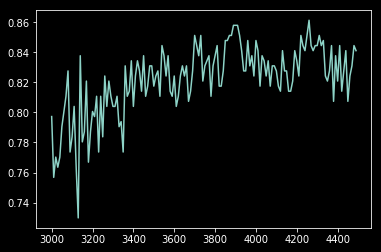

In [4]:
# 读取训练模型并评估

import matplotlib.pyplot as plt  # noqa： E402
import numpy as np  # noqa： E402

k = Kernel()
k.build('inference')
prefix = 'data/__cache__/detection/__logs__/detection20190509T1729'

x = np.arange(3000, 4500)
x = [x_i for x_i in x if x_i % 10 == 0]

y = []
for i in x:
    mid = str(i).zfill(4)
    k.load_weights(path=f'{prefix}/mask_rcnn_detection_{mid}.h5')
    y.append(k.eval())
plt.plot(x, y)

plt.savefig("train_res_1000_4500.png")
# 下面行不写会出现 [<matplotlib.lines.Line2D at 0x111814390>] 字样
plt.show()


In [5]:
curv = zip(x,y)
for x in curv:
  print(x)
  


(3000, 0.7972972972972973)
(3010, 0.7567567567567568)
(3020, 0.7702702702702703)
(3030, 0.7635135135135135)
(3040, 0.7702702702702703)
(3050, 0.7905405405405406)
(3060, 0.8006756756756757)
(3070, 0.8108108108108109)
(3080, 0.8277027027027027)
(3090, 0.7736486486486487)
(3100, 0.7837837837837838)
(3110, 0.8040540540540541)
(3120, 0.7635135135135135)
(3130, 0.7297297297297297)
(3140, 0.8378378378378378)
(3150, 0.7804054054054054)
(3160, 0.7871621621621622)
(3170, 0.8209459459459459)
(3180, 0.7668918918918919)
(3190, 0.7871621621621622)
(3200, 0.8006756756756757)
(3210, 0.7972972972972973)
(3220, 0.8108108108108109)
(3230, 0.7736486486486487)
(3240, 0.8108108108108109)
(3250, 0.7837837837837838)
(3260, 0.8243243243243243)
(3270, 0.8040540540540541)
(3280, 0.8209459459459459)
(3290, 0.8108108108108109)
(3300, 0.8040540540540541)
(3310, 0.8040540540540541)
(3320, 0.8108108108108109)
(3330, 0.7905405405405406)
(3340, 0.793918918918919)
(3350, 0.7736486486486487)
(3360, 0.831081081081081)
(33